## Multiclass Classification

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

1. one-versus-all (OvA) ,it is also called one versus the rest
2. One versus to One

OvO si preferable for SVM as SVM work poorly with big data set and OvO perform fast as it only needs to be trained on the part of the training set for the two classes.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO)

In [6]:
# Split data in trainig set and test set 
X = mnist['data']
y =  mnist['target']
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

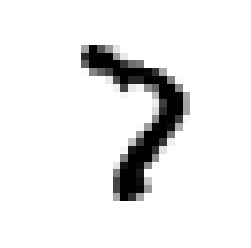

Actual Value :7.0


In [16]:
#Lets see a sample pictures
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.imshow(X[42000].reshape(28,28),cmap=plt.cm.binary)
plt.axis('off')
plt.show()
print('Actual Value :{}'.format(y[42000]))

Stochastic gradient descent (SGD) implements regularized linear models. 

For best results using the default learning rate schedule, the data should
have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays
of floating point values for the features. The model it fits can be
controlled with the loss parameter; by default, it fits a linear support
vector machine (SVM).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value because of the regularizer, the
update is truncated to 0.0 to allow for learning sparse models and achieve
online feature selection.

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42,max_iter=500)
sgd_clf.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=500, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [17]:
sgd_clf.predict(X[42000:42001])  # Predicting correctly

array([7.])

In [22]:
sgd_score = sgd_clf.decision_function(X[42000:42001])

Decision function values shows that model is more confident to predicting the input to
7 as achieved highest value 4086.55224932

In [25]:
np.argmax(sgd_score)

7

In [26]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### SGD with One Vs One

SGD Classifier by default uses OvA. Let force it to user one Vs One to see how it impact the result

In [28]:
from sklearn.multiclass import OneVsOneClassifier

sgd_ovo = OneVsOneClassifier(SGDClassifier(random_state=42,max_iter=500))
sgd_ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=500, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False),
          n_jobs=1)

In [29]:
sgd_ovo.predict(X[42000:42001])

array([7.])

In [32]:
sgd_ovo_score = sgd_ovo.decision_function(X[42000:42001])
np.argmax(sgd_ovo_score)

7

## Random Forest

Ramdom forest support multiclass classfiction, hence there is no need to force any strategy.

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [36]:
rf_clf.predict(X[42000:42001])

array([7.])

In [37]:
rf_clf.predict_proba(X[42000:42001])

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

There is no doubt about predicting 7. it is getting 100% probability.

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf,X_train, y_train, cv = 3, scoring="accuracy")

array([0.9365127 , 0.93934697, 0.94234135])

In [43]:
# lets try to imporve performance of SGD classifier by standardizing data

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train.astype(np.float64))

In [46]:
# before standard scalar
cross_val_score(sgd_clf,X_train, y_train, cv = 3, scoring="accuracy")

array([0.87832434, 0.82469123, 0.87618143])

In [47]:
# after standard scale
cross_val_score(sgd_clf,X_train_scaled, y_train, cv = 3, scoring="accuracy")

array([0.90366927, 0.90474524, 0.90843627])

## Error Analysis

In [53]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train, cv=3)

In [56]:
from sklearn.metrics import confusion_matrix
conf_mtx = confusion_matrix(y_train, y_train_pred)
conf_mtx

array([[5618,    0,   23,    8,    9,   54,   39,    7,  164,    1],
       [   1, 6422,   40,   27,    5,   43,    5,    8,  176,   15],
       [  28,   28, 5304,   97,   72,   26,   68,   43,  280,   12],
       [  29,   21,  126, 5278,    2,  225,   28,   43,  300,   79],
       [  13,   15,   51,   12, 5259,   12,   42,   29,  224,  185],
       [  33,   17,   36,  183,   54, 4545,   82,   19,  379,   73],
       [  29,   17,   47,    2,   43,   98, 5579,    3,   99,    1],
       [  20,   11,   58,   32,   51,   10,    3, 5741,  102,  237],
       [  23,   69,   50,   93,    4,  125,   31,   11, 5382,   63],
       [  24,   20,   31,   71,  122,   37,    1,  187,  247, 5209]])

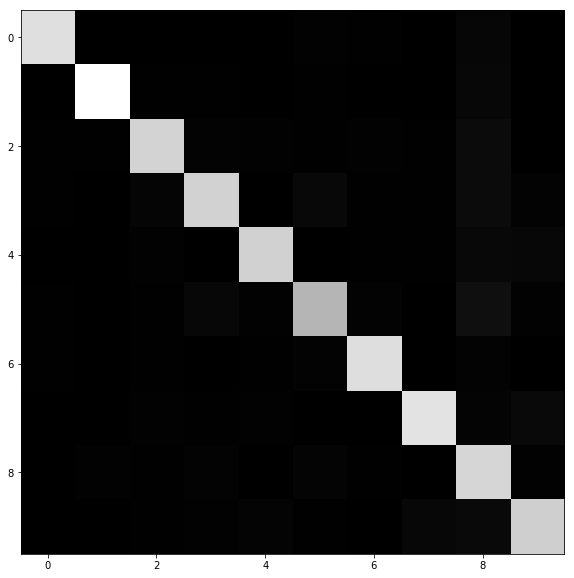

In [62]:
# Lets plot the confussion matrix
plt.figure(figsize=(10,10))
plt.imshow(conf_mtx,cmap=plt.cm.gray)
plt.show()

Digonal shows all correctly classified value, while other area showing values that are not classified correctly. Darkness of the are area indicate that algoritham did quite will and there are very less numbers predicted wronly. Let see data in reverse scale

In [72]:
row_sum = conf_mtx.sum(axis = 1, keepdims=True)
norm_conf_mtx = conf_mtx/row_sum
np.fill_diagonal(norm_conf_mtx,0)

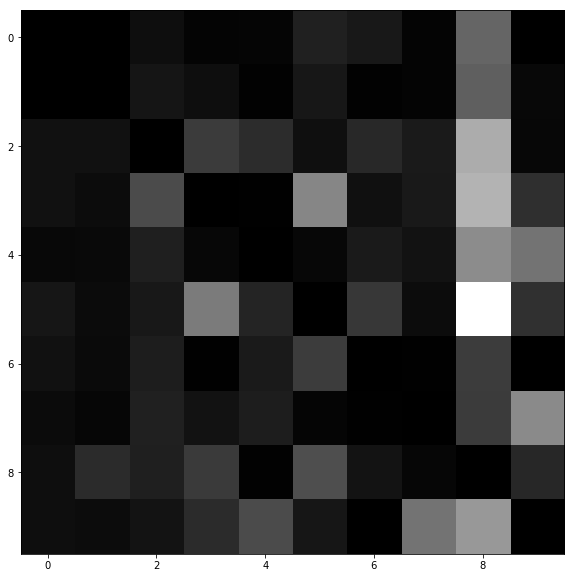

In [74]:
plt.figure(figsize=(10,10))
plt.imshow(norm_conf_mtx,cmap=plt.cm.gray)
plt.show()

Class 8 and 9 are quite bright, it shows that these class are not predicted correctly. simimlar issue looks at 3 and 5. let see wrongly classified images

In [75]:
cla_a, cla_b = 3, 5
X_aa = X_train[ (y_train == cla_a) & (y_train_pred == cla_a)  ]
X_ab = X_train[ (y_train == cla_a) & (y_train_pred == cla_b)  ]
X_ba = X_train[ (y_train == cla_b) & (y_train_pred == cla_a)  ]
X_bb = X_train[ (y_train == cla_b) & (y_train_pred == cla_b)  ]

In [91]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

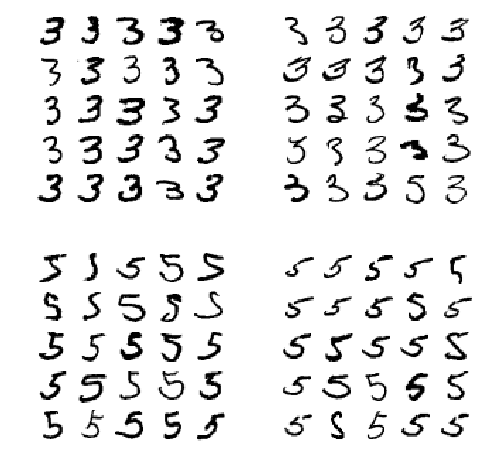

In [93]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

0